# 模板匹配 
✔️ 模板匹配是用来在一幅大图里搜寻模板图像位置的方法

✔️ 采用Opencv函数 cv2.matchTemplate()

## 1.1  matchTemplate() 

matchTemplate()它只是在输入图像上滑动模板图像（如在2D卷积中），并比较模板图像下的输入图像的模板和补丁。

如果输入图像的大小（WxH）且模板图像的大小（wxh），则输出图像的大小为（W-w + 1，H-h + 1）。

获得结果后，可以使用cv.minMaxLoc()函数查找最大/最小值的位置。将其作为矩形的左上角，并将（w，h）作为矩形的宽度和高度。那个矩形是你的模板区域。

模板匹配的原理其实很简单，就是不断地在原图中移动模板图像去比较，有6种不同的比较方法：
- TM_SQDIFF：计算平方不同，计算出来的值越小，越相关
- TM_CCORR：计算相关性，计算出来的值越大，越相关
- TM_CCOEFF：计算相关系数，计算出来的值越大，越相关
- TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
- TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关

In [5]:
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9) 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)  

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

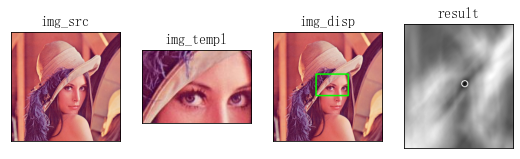

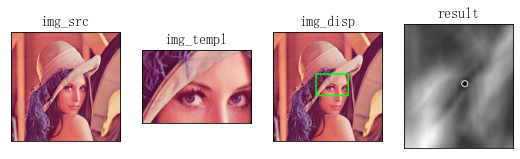

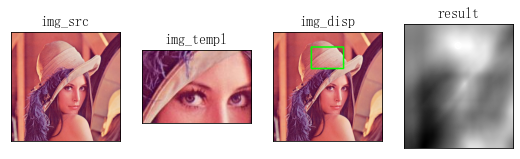

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#读入图像，截图部分作为模板图片
img_src = cv2.imread('./images/lena.jpg')
img_templ = img_src[200:300,200:350].copy() 

for method in range(3):
    #模板匹配
    result = cv2.matchTemplate(img_src, img_templ, method)
    #计算匹配位置
    min_max = cv2.minMaxLoc(result)
    if method == 0 or method == 1:   #根据不同的模式最佳匹配位置取值方法不同
        match_loc = min_max[2]
    else:
        match_loc = min_max[3]      
    #注意计算右下角坐标时x坐标要加模板图像shape[1]表示的宽度，y坐标加高度
    right_bottom = (match_loc[0] + img_templ.shape[1], match_loc[1] + img_templ.shape[0])
    # print('result.min_max:',min_max)
    # print('match_loc:',match_loc)
    # print('right_bottom',right_bottom)
    #标注位置
    img_disp = img_src.copy()
    cv2.rectangle(img_disp, match_loc,right_bottom, (0,255,0), 5, 8, 0 )
    cv2.normalize( result, result, 0, 255, cv2.NORM_MINMAX, -1 )
    cv2.circle(result, match_loc, 10, (255,0,0), 2 )
    #显示图像
    

    titles = ['img_src', "img_templ","img_disp","result"]
    images = [img_src, img_templ,img_disp,result ] 

    for i in range(4):
        plt.subplot(1, 4, i + 1)
        if i < 3:
             plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        else:
             plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()  


上面的例子用的模板图像和源图像中的一部分是完全一样了，为了演示matchTemplate()的匹配能力

我们将前面的例子稍作修改，截取模板后对源图像进行平滑处理，再来看看匹配的结果如何。

比如将源图像做一次33×33大小的均值平滑后再匹配

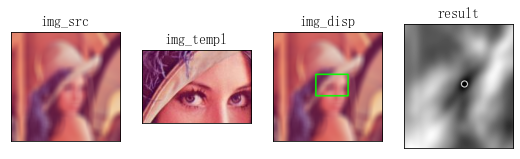

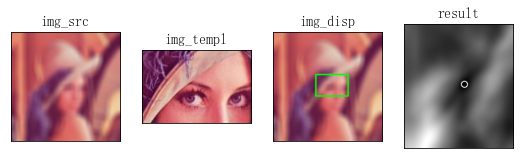

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#读入图像，截图部分作为模板图片
img_src = cv2.imread('./images/lena.jpg')
img_templ = img_src[200:300,200:350].copy()  
img_src = cv2.blur(img_src,(33,33)) ##### 平滑处理

for method in range(2):
    #模板匹配
    result = cv2.matchTemplate(img_src, img_templ, method)
    #计算匹配位置
    min_max = cv2.minMaxLoc(result)
    if method == 0 or method == 1:   #根据不同的模式最佳匹配位置取值方法不同
        match_loc = min_max[2]
    else:
        match_loc = min_max[3]      
    #注意计算右下角坐标时x坐标要加模板图像shape[1]表示的宽度，y坐标加高度
    right_bottom = (match_loc[0] + img_templ.shape[1], match_loc[1] + img_templ.shape[0])
    # print('result.min_max:',min_max)
    # print('match_loc:',match_loc)
    # print('right_bottom',right_bottom)
    #标注位置
    img_disp = img_src.copy()
    cv2.rectangle(img_disp, match_loc,right_bottom, (0,255,0), 5, 8, 0 )
    cv2.normalize( result, result, 0, 255, cv2.NORM_MINMAX, -1 )
    cv2.circle(result, match_loc, 10, (255,0,0), 2 )
    #显示图像
    

    titles = ['img_src', "img_templ","img_disp","result"]
    images = [img_src, img_templ,img_disp,result ] 

    for i in range(4):
        plt.subplot(1, 4, i + 1)
        if i < 3:
             plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        else:
             plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()  


同样地，我们不对源图像做变化，而只是平滑处理模板图像，制造出模板图像和源图像的差异出来：

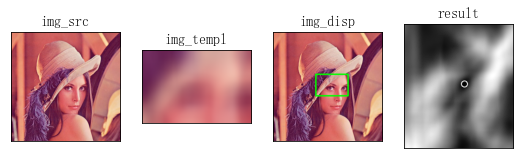

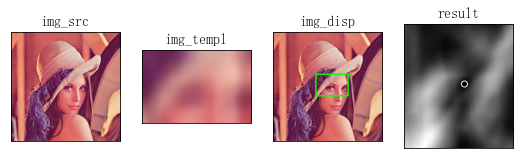

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#读入图像，截图部分作为模板图片
img_src = cv2.imread('./images/lena.jpg')
img_templ = img_src[200:300,200:350].copy()  
img_templ = cv2.blur(img_templ,(33,33)) ##### 平滑处理

for method in range(2):
    #模板匹配
    result = cv2.matchTemplate(img_src, img_templ, method)
    #计算匹配位置
    min_max = cv2.minMaxLoc(result)
    if method == 0 or method == 1:   #根据不同的模式最佳匹配位置取值方法不同
        match_loc = min_max[2]
    else:
        match_loc = min_max[3]      
    #注意计算右下角坐标时x坐标要加模板图像shape[1]表示的宽度，y坐标加高度
    right_bottom = (match_loc[0] + img_templ.shape[1], match_loc[1] + img_templ.shape[0])
    # print('result.min_max:',min_max)
    # print('match_loc:',match_loc)
    # print('right_bottom',right_bottom)
    #标注位置
    img_disp = img_src.copy()
    cv2.rectangle(img_disp, match_loc,right_bottom, (0,255,0), 5, 8, 0 )
    cv2.normalize( result, result, 0, 255, cv2.NORM_MINMAX, -1 )
    cv2.circle(result, match_loc, 10, (255,0,0), 2 )
    #显示图像
    

    titles = ['img_src', "img_templ","img_disp","result"]
    images = [img_src, img_templ,img_disp,result ] 

    for i in range(4):
        plt.subplot(1, 4, i + 1)
        if i < 3:
             plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        else:
             plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()  


## 1.2 多对象模板匹配 

如果源图像中存在多个匹配对象的查找方法，matchTemplate()匹配的结果是一个匹配程度值，执行完matchTemplate()后得到的结果“图像”可以做一次阈值化处理，大于或小于某个阈值的位置就认为是匹配成功的位置。

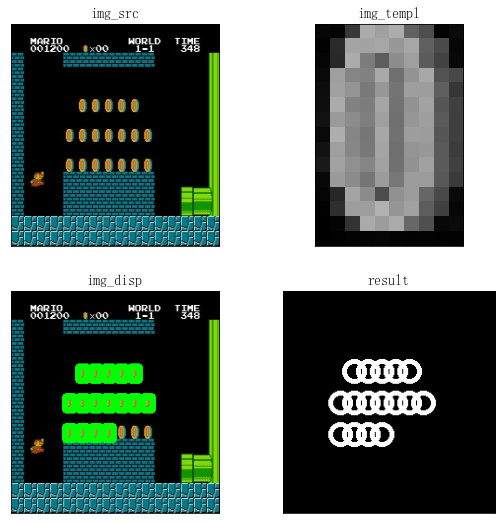

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#读入图像，截图部分作为模板图片
img_src = cv2.imread('./images/mario.png')
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
img_templ = cv2.imread('./images/mario_coin.png', 0)
#模板匹配
result_t = cv2.matchTemplate(img_gray, img_templ, cv2.TM_CCOEFF_NORMED)
#筛选大于一定匹配值的点
val,result = cv2.threshold(result_t,0.9,1.0,cv2.THRESH_BINARY)
match_locs = cv2.findNonZero(result)

img_disp = img_src.copy()
for match_loc_t in match_locs:
    #match_locs是一个3维数组，第2维固定长度为1，取其下标0对应数组
    match_loc = match_loc_t[0]
    #注意计算右下角坐标时x坐标要加模板图像shape[1]表示的宽度，y坐标加高度
    right_bottom = (match_loc[0] + img_templ.shape[1], match_loc[1] + img_templ.shape[0])
    #标注位置
    cv2.rectangle(img_disp, match_loc, right_bottom, (0,255,0), 5, 8, 0 )
    cv2.circle(result, match_loc, 10, (255,0,0), 3 )
    

titles = ['img_src', "img_templ","img_disp","result"]
images = [img_src, img_templ,img_disp,result ] 

for i in range(4):
    plt.subplot(2, 2, i + 1)
    if i < 3:
         plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
         plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()  
